# Lab 1: EDA, Pre-processing, and Dimensionality Reduction


**Outline:**

1. Reading the file, Summary Statistics

2. Missing Values and Imputation

3. EDA (Plotting, Outliers, Highly correlated features)

4. Standardization

5. Principal Component Analysis


In [2]:
#Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#download scikit-learn
#We will use scikit-learn library during this course. Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning 
#pip install scikit-learn 


In [ ]:
# you can check the version using __version__

pd.__version__

# 1. Reading the file and summary statistics

### Reading the file


In this session we will use the cleveland, heart disease dataset.  
[link]( https://archive.ics.uci.edu/ml/datasets/heart+disease) to the dataset with information. 

#Note:
The header parameter specifys the Row number(s) to use as the column names, and the start of the data

In [3]:
#Note:
# The header attribute specifys the row number(s) to use as the column names, and the start of the data. 

data = pd.read_csv("processed.cleveland.data", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### **Dataset Information as found in heart-disease.names**

This database contains 14 attributes and 303 patients that might not or might have a heart disease diagnoses. 

There are both continuous and categorical attributes. 

For example, the dataset has the age of the patients, resting blood pressure, maximum heart rate for numerical features. 
While sex, chest pain type or number of major vessels are categorical features. 

The class label is categorical, consists of labels from 0 to 4 and refers to a diagnosis of a heart disease. 
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



### Feature explanation
- age = in years // numerical, continuous

- sex    =   (0 is female, 1 is male) // categorical


- cp     = chest pain type (1 -> typical angina,  2 -> atypical angina,  3 -> non-anginal, 4 -> asymptomatic) //categorical

- trestbps = resting blood pressure//continuous

- chol      = serum cholestral in mg/dl //continuous

- fbs       = fasting blood sugar > 120 mg/dl is 1 otherwise 0 //categorical
 
- restecg   = resting electrocardiographic result, 0 -> normal, 1 -> St-T wave abnormality, 2 -> probable or definite hypertropy//categorical

- thalach   = maximum heart rate achieved//continuous

- exang     = exercise induced angina (1 = yes, 0 = no)//categorical

- oldpeak   = ST depression induced by exercise relative to rest//continuous

- slope     = the slope of the peak exercise ST segment (1 -> upslopping, 2 -> flat, 3 -> downslopping)//categorical

- ca        = number of major vessels (0-3) covered by flourosopy//categorical

- thal      = (3 -> normal, 6 -> fixed defect, 7 -> reversible defect)//categorical

- class     = diagnosis of heart disease//categorical

### Change the column/feature names

The name of the columns and generally information about this dataset can be found under the heart-disease.names file. 


In [6]:
#set_axis assigns a  desired index to given axis. 
#Input:
#    a list-like index
#    the axis to update

data = data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'], axis=1)

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


To summarize: 

- numerical are: age, trestbps, chol, thalac, oldpeak
- categorical are: sex, cp, fbs, restecg, exang, slope, thal, class
- our class/target is the column class


### Information and summary statistics

In [8]:
# you can see the first rows of the dataset by calling the head() method and inside there pass a small number of rows
data.head(10)

# Try to see what changes if you pass a different number of rows!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [9]:
# check number of rows(patients) and colums(features)
data.shape

(303, 14)

You can print information about the dataset by using the info() method. 

We can see that the attributes ca and thal are of object type.

A data type is essentially an internal construct that a programming language uses to understand how to store and manipulate data. 
- int: for integer numbers
- float: for floating point numbers
- object: for text or mixed numeric and non-numeric values

Data types are one of those things that you don’t tend to care about until you get an error or some unexpected results. 
It is also one of the first things you should check once you load a new data into pandas for further analysis.

In [10]:
# check the data types of the dataset
print('Data Show Info\n')
data.info()


Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


You can print some summary statistics about the data using the describe() method.

It can be useful to spot columns containing outliers, or erroneous data: what if the max value of age was 1234 years? or if the minimum value was -3 years?

It is always a good idea to take a look at the description of your data before proceeding any further, to see if anything does look out of place.

In [11]:
print('Data Show Describe\n')
data.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


And finally the columns names can be accessed with the columns attribute:

In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

Note that, while methods are called with the syntax _method()_, attributes are called using just _attribute_.

If you try to call an attribute using the method syntax, you will get a TypeError, as in the next cell. You can get familiar with the error deleting the # at the beginning of the line.

In [11]:
#data.columns()


**Outline:**

1. Reading the file, Summary Statistics ✅

2. Missing Values and Imputation 🔜

3. EDA (Plotting, Outliers, Highly correlated features)

4. Standardization

5. Principal Component Analysis

# 2. Missing Values and Imputation

Missing values: when no data are stored (due to some failure to record them or maybe data corruption).
We need to handle them, as many machine learning algorithms do not support missing values.

![Getting Started](missing_data.png)

Sometimes missing values will be marked as such, but also as some random string like '?', '_', essentially when no data are stored. 


isnull() will return in every cell of the df True if the value is Null or False if it's not. 
if on that you additionally call any(),  it will summarize the results along a column 

### Checking for null values

In [13]:
# checking for null values
# To detect NaN values pandas uses either .isna() or .isnull()

data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
class       False
dtype: bool

### Checking for missing values in other forms

The previous command tells us that there are no missing values, but it only looks for None and NaN values. 

We have noticed that that the attributes "ca" and "thal" are of object type which means they may have mixed types. 
Let's see what is unique about them compared to the others!

Rule of thumb! ALWAYS open the dataset file and investigate the data yourself and look for inconsistencies. 
Missing values might be written like: "missing", "?", "_", or others, and if they are located in a column that contains strings it might not be evident that they are missing values.

In [14]:
# Print the unique values in the "ca" and "thal" columns

print(data['ca'].unique())
print(data['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


'?' doesn't look like a proper value! Someone might have used it instead of putting a proper missing value flag.

### How to handle the missing values

In general,  there are different ways of dealing with missing values

For example:

 
1. if the feature is nominal (categorical), replace missing with most frequent category
2. if feature is numeric, replace it with the mean value
3. simply delete the rows that have missing values if there is an insignificant amount of them
4. delete the columns that have missing values if they are the majority of the values in that column
5. advanced approaches, like using ML to predict the missing values, are also possible

The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values, but it might bring to a significant loss of data.
We need to check how many missing values are in each column before deleting everything.

#### Small example:
Now we have a table with missing values. Take a look at it: how should we handle the missing values in this case?

![Small table](small_table.png)

### How many missing values per feature?

In [16]:
print("ca: ", (data['ca'] == "?").sum())
print("thal: ", (data['thal'] == "?").sum())
print("#################")
print("whole df/ per column:\n", (data == "?").sum(axis=0)) #sum fields where data equals to ? by axis

ca:  4
thal:  2
#################
whole df/ per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64


### Delete rows with missing values

drop every row that contains '?' in the two columns that we have spotted.

In case you have empty values in the form of nan, you can use a specific Pandas method, _dropna()_, with
dataframe = dataframe.dropna()

We will use the version of the dataset without missing values for the rest of the lab

In [18]:
data_dropped = data[(data["ca"] != '?') & (data["thal"] != '?')]

In [19]:
data_dropped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


### Imputation using the most frequent value with sklearn

The missing values are just a few so we can simply delete the rows that contain missing values. For the rest of the assignment we will use the dataframe with the dropped missing values.  
However, this is an example of how you can impute missing values using the SimpleImputer from sklearn. 

In [23]:
#download sklearn first if you haven't already!

from sklearn.impute import SimpleImputer
#first we define the object
imputer = SimpleImputer(missing_values="?", strategy='most_frequent')#it works along the columns
#then fit it to the data
imputer.fit(data)

data_imputed = imputer.transform(data)

SimpleImputer allows us to choose different strategies.
In this case, since the data was categorical, choosing the average or median would have been incorrect, and the mode was the appropriate choice.

If the data to be imputed contained a numeric variable, we could have chosen a different strategy.

In [21]:
#Convert it to a dataframe
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
data_imputed


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [22]:
imputer.statistics_ #showing the most frequent value

array([58.0, 1.0, 4.0, 120.0, 197.0, 0.0, 0.0, 162.0, 0.0, 0.0, 1.0,
       '0.0', '3.0', 0], dtype=object)


**Outline:**

1. Reading the file, Summary Statistics ✅

2. Missing Values and Imputation ✅

3. EDA (Plotting, Outliers, Highly correlated features) 🔜

4. Standardization

5. Principal Component Analysis

# 3. Exploratory Data Analysis (EDA)
Discover patterns, spot anomalies, check assumptions with the help of summary statistics and  graphical representations. 


Two types of EDA:
- Univariate: data being analyzed consists of just one variable. You can use Histograms, Barplots, Boxplots (can be used for outliers) etc

- Multivariate : investigate the relationship between two or more variables of the data through cross-tabulation or statistics.  Grouped bar plots, scatterplots, heatmaps for correlation etc

### How many patients are diagnosed with a heart disease? 

**Remember**:
- presence of heart disease: values 1,2,3,4 
- absence: value 0

The method *value_counts()* returns a series containing the count for each unique value in the data

In [24]:
#count_values(): returns a series containing counts of unique values

data_dropped["class"].value_counts()

class
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

### Balancing the problem

There are 160 patients who do not have heart disease.
While the patients who are positive to heart disease are distributed among labels 1 to 4, with each class having a small number of patients.
We can make the problem more balanced by transforming all these positive class labels to 1.

This process can also be used later on in supervised learning to make your dataset more balanced, but for now we will do it for demonstration and visualization purposes.

We will use the _replace()_ method to map the values  2, 3, 4 to 1. Another possibility would be to use the numpy method _np.where()_ to change the values.

In [25]:
# here we are replacing 2,3,4 with 1. The loc method is used to access a group of rows (all of them, since we are using :) and columns (only column 'class', in this case).
data_dropped['class'] = data_dropped.loc[:, 'class'].replace({2: 1, 3: 1, 4:1}) # we want to replace 2, 3 and 4 to 1s 

# alternative: data_dropped['class'] = np.where((data_dropped['class']>0),1,0).
# in this case, we would be taking only a slice of our dataframe (indicated by the label 'class') and replacing the values bigger than 0 with 1 and the rest with 0.

C:\Users\armin\AppData\Local\Temp\ipykernel_5524\3964269839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['class'] = data_dropped.loc[:, 'class'].replace({2: 1, 3: 1, 4:1}) # we want to replace 2, 3 and 4 to 1s


In [26]:
# let's count the values again
data_dropped["class"].value_counts()

# We have a more balanced dataset now!

class
0    160
1    137
Name: count, dtype: int64

In [27]:
data_dropped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Visualize the class - barplot

The figure object is your empty canvas.

We will use _plt.style.use('ggplot')_: the  "ggplot" style adjusts the style of our plot to emulate ggplot (a popular plotting package for R). Feel free to experiment changing the styles.

Barplot parameters: 
    x : a sequence of scalars (unique values of the class label)
    y the height of the bars (how many samples each class has)

set_xticks(): Set the x ticks with list of ticks
    Essentialy here we will pass the names of the bars. 

grid(True): Whether to show the grid lines. True/False

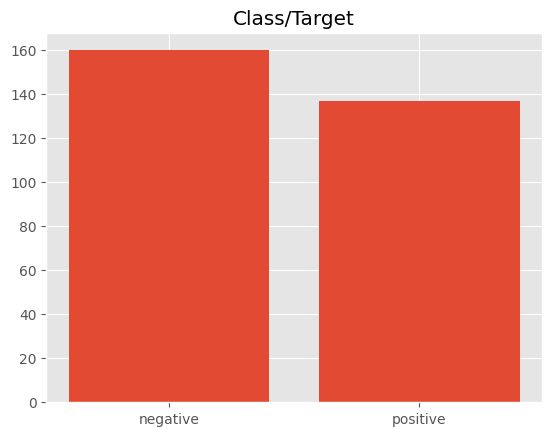

In [28]:
# first create a series where you will store the class label
class_label = data_dropped["class"]
# replace the 0 with negative and 1 with positive, for the sake of interpretation/visualization
class_label = class_label.replace({0: 'negative', 1: 'positive'}) # Note that we are using the same method as before!
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(class_label.unique(), class_label.value_counts())
ax.set_title("Class/Target")
ax.set_xticks(class_label.unique())
ax.grid(True)

### Check for outliers with boxplots

Outliers can either be a mistake or just variance.

To check for outliers we can use the boxplot to see the distribution of the attributes. 
Any outliers are normally outside the plot region.

We will create boxplots for all the numerical features

Instead of plt.figure we can call plt.subplots and specify how many rows and columns of plots we want.
if nrows=1, ncols=2 it will create 1 row with 2 plots/ if nrows=2, ncols=3 it will create 2 rows with 3 plots each.

Note that the axes attribute is just a list of the matplotlib axes, so we can actually iterate through them and create different plots!

The *tight_layout()* method automatically adjusts subplot params so that the subplot(s) fits in to the figure area


barplot:
    x: The input data.

There are a few variants of boxplots out there, but the one that we will use will show
- the median value with a coloured line
- the box, extending from the first to the third quartile
- the whiskers, extending from the first (or the third) quartile to include the data points that are at most as distant as 1.5 times the interquartile range from it
- the points after the whiskers, indicating the outliers

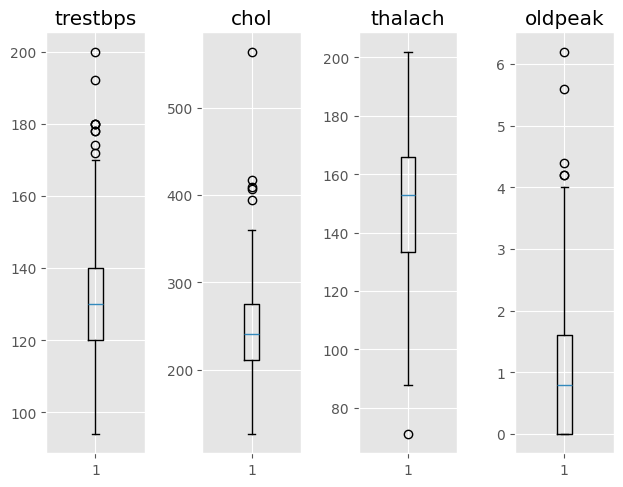

In [29]:
fig, ax = plt.subplots(1, 4)

plt.tight_layout()
ax[0].set_title("trestbps")
ax[0].boxplot(data_dropped['trestbps'])

ax[1].set_title('chol')
ax[1].boxplot(data["chol"])

ax[2].set_title('thalach')
ax[2].boxplot(data["thalach"])

ax[3].set_title('oldpeak')
ax[3].boxplot(data["oldpeak"])
plt.show()

### Grouped bar-plot

If we want to compare the values of males and females for each of the class labels, we can make a grouped box-plot.

_groupby()_: allows us to group rows together based on a column and perform an aggregate function on them. 
After _groupby()_, we need to specify a summarization function, such as *value_counts()*, _sum()_, or _average()_.

To create the plot, we call unstack, which pivots the grouped dataframe back, and just call plot with kind='bar'

If we use True for the stacked option, the bars for the different class labels will be put one top of each other, instead of next to each other. 
Converting it to False we can see the difference

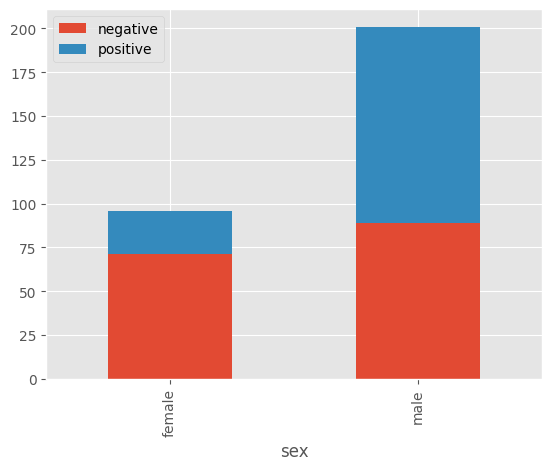

In [30]:
ylabels = ['negative', 'positive']
labels = ("female", "male")

positions = (0, 1)

s_x = data_dropped.groupby("sex")['class'].value_counts()
s_x.unstack().plot(kind='bar', stacked=True) # false will make it unstacked, meaning that female and male will be not only separated based on gender but also by negative and positive

plt.legend(labels=ylabels)
plt.xticks(positions, labels)
plt.show()


We can check how the _groupby()_ and _unstack()_ methods work:

s_x contains the 'class' column of the data grouped by sex, using value counts as summarization function.

In [31]:
s_x

sex  class
0.0  0         71
     1         25
1.0  1        112
     0         89
Name: count, dtype: int64

In [32]:
#if we call unstack the dataframe now is pivoted back!
s_x.unstack()

class,0,1
sex,,
0.0,71,25
1.0,89,112


### Grouped bar-plot
How many people are negative to heart disease and how many are posive, per age value?

We can basically repeat the same procedure, but grouping by age

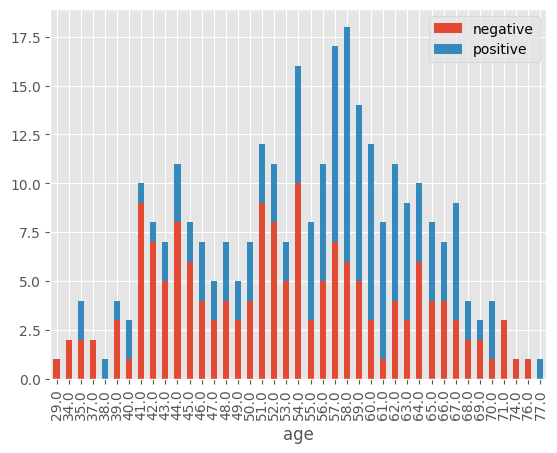

In [33]:
by_age= data_dropped.groupby(["age"])['class'].value_counts()
by_age.unstack().plot(kind='bar', stacked=True)
plt.legend(labels=ylabels)
plt.show()


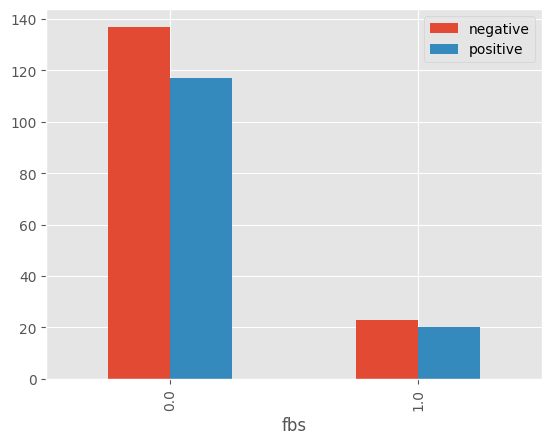

In [34]:
#similarly
fbs_by_class = data_dropped.groupby("fbs")['class'].value_counts()
fbs_by_class.unstack().plot(kind='bar', stacked= False)
plt.legend(labels=ylabels)
plt.show()

### Boxplot with seaborn 
Age in relation to class

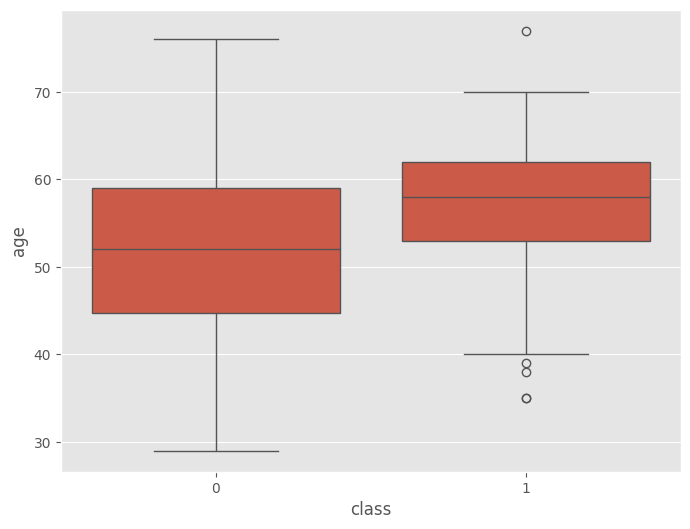

In [35]:
#boxplot of age in relation to the class

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="class", y="age", data=data_dropped)
plt.show()

### Highly correlated features and Heatmap

A strong correlation is indicated by a Pearson Correlation Coefficient value near 1.
Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations. 

Therefore, when looking at the Heatmap, we want to see what correlates most with the class label.

- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

Using the method _corr()_ gives us the Pearson correlation matrix between the variables that we pass to the method.

We can then use seaborn to plot rectangular data as a color-encoded matrix.
The parameter data needs to be a rectangular dataset of pairwise correlations.

The resulting plot is clearly symmetrical: the Pearson Correlation Coefficient of A and B is the same of that of B and A.

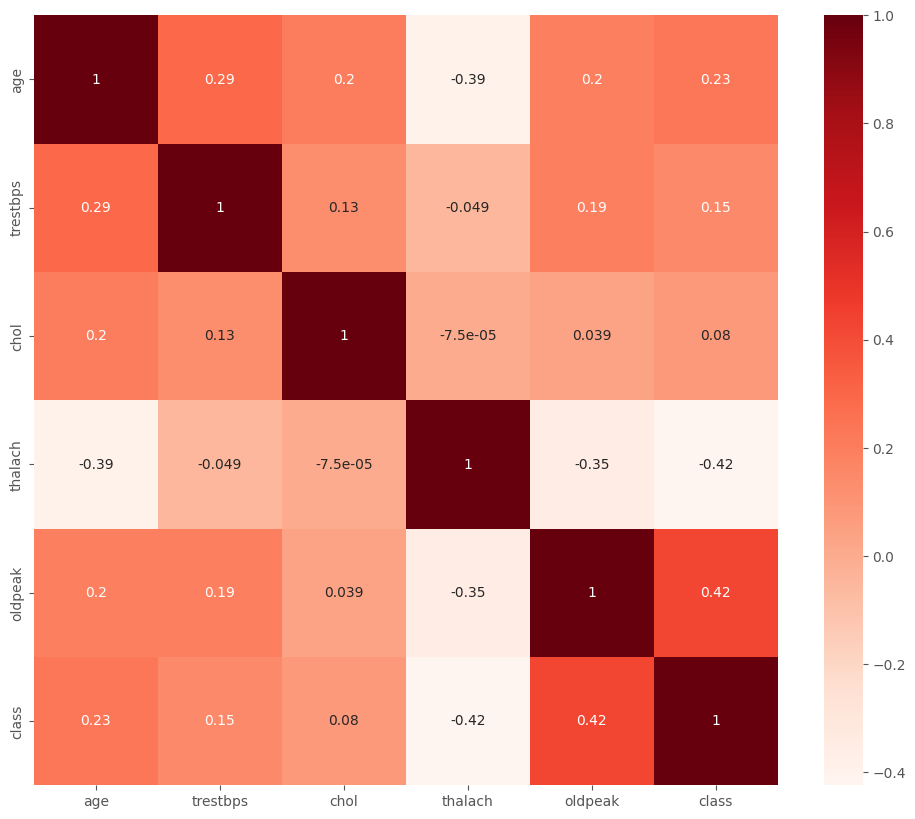

In [37]:
# correlation stands for measuring the effect between different variables. 1 means full positive correelation (e.g.: if age goes up, the risk of getting heart disease goes up)
# - 1 means negative correlation 
# 0 means no correlation

plt.figure(figsize=(12,10))

cor = data_dropped[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'class']].corr()

sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds);

plt.show()

### Pairplot

Pairplots are used to investigate pairwise relationships.

To use it, we make a list of the numerical values, and in hue we can pass the class, to give different colours to the samples from the different classes.

On the diagonal we see the distribution of the different numerical variables.

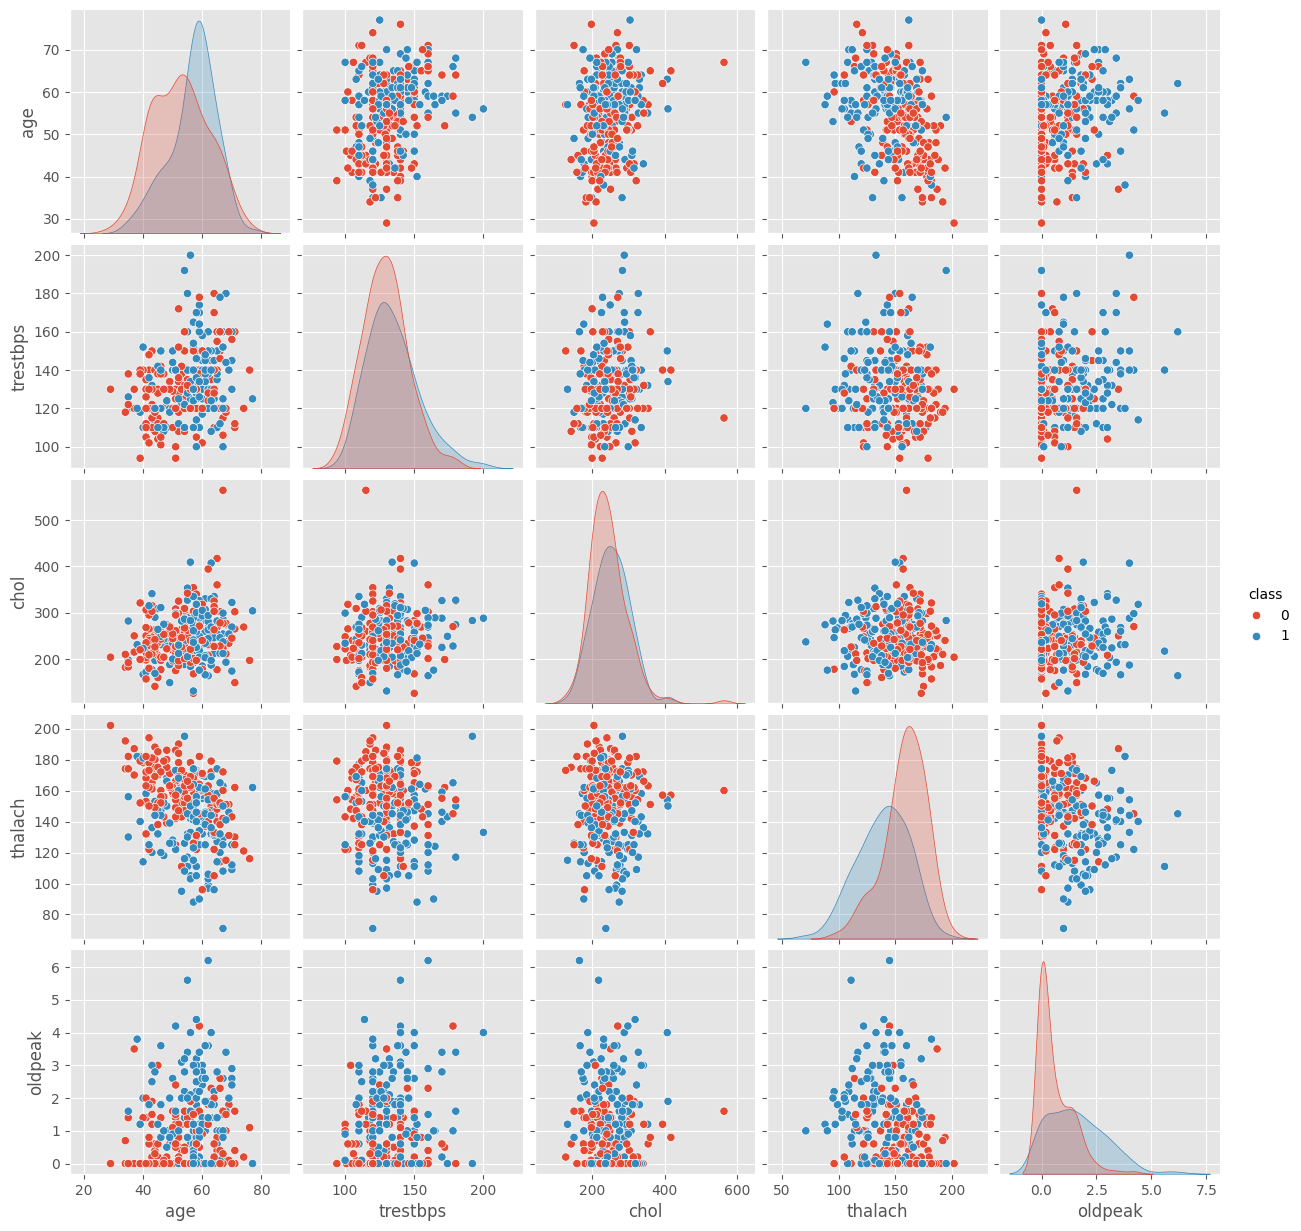

In [38]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data_dropped[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'class']], hue='class', height=2.5)


**Outline:**

1. Reading the file, Summary Statistics ✅

2. Missing Values and Imputation ✅

3. EDA (Plotting, Outliers, Highly correlated features) ✅

4. Standardization 🔜

5. Principal Component Analysis

# 4. Standardization 

Standardization is a crucial step before performing PCA, since we are interested in the components that maximize the variance.
We only standardize the numerical features, not the categorical ones, even if they are represented with numbers. Class should not be standardized either!

The standardized value $z$ is calculated by removing the mean and subtracting the mean and dividing by the _standard_ deviation, from which it gets its name.
The formula is:

$$z = \frac{x - \mu}{\sigma}$$

where x is each of the values for a feature, $\mu$ is the average value of all the values for that feature, and $\sigma$ is the standard deviation for that feature.
We repeat the process for all the **numerical features**.

Standardized features have a mean of 0 and a standard deviation of 1, due to how $z$ is calculated.

It is also called Z-Normalization, Z-Score, or Z-Score Normalization, so don't get scared if you hear a different name, you already know the technique!

There is at least another similar procedure, called Normalization.
Normalization is also only applied to the numerical features, and it should never be applied to the class label.

The normalized value $x_{norm}$ is calculated by subtracting the minimum value $x_{min}$ to each value in a feature, and then dividing by the difference between the maximum and the minimum value $x_{max}$ and $x_{min}$.
The formula is:

$$x_{norm} = \frac{(x - x_{min})}{(x_{max} - x_{min})} $$

The normalized value has a minimum of 0 and a maximum of 1.

Here is a small table summarizing the differences:

|                  |                                                                       Standardization                                                                       |                                                                                                    Normalization                                                                                                    |
|:----------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|      Formula     |                                                                     $z = \frac{x-u}{s}$                                                                     |                                                                                   $x_{norm}=\frac{(x-x_{min})}{(x_{max}-x_{min})}$                                                                                  |
|   Distribution   |                                                                         Mean=0, SD=1                                                                        |                                                                                                       Unknown                                                                                                       |
|       Range      |                                                                           Unknown                                                                           |                                                                                                       $[0,1]$                                                                                                       |
| Why do we use it | We are interested in knowing how much something differs from the average: A standardized value of 1 tells us that the original value is 1 SD over the mean. | We want to compare values measured using different units. This reduces the influence created by using smaller units, like mm, which would otherwise appear greated than that created by using bigger units, like m. |

In this notebook we will apply Standardization, since we have measures that are not only taken using different units, but also representing completely different concepts, so it makes more sense to check their difference from the average, rather than trying to bring, for example, age and cholesterol to the same unit.

We will do it using StandardScaler, from sklearn. Normalization can be applied using MinMaxScaler, still from sklearn.

Information about StandardScaler: [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Important methods:
- _fit()_ computes the mean and std to be used for later scaling.
- _transform()_ uses a previously computed mean and std to autoscale the data
- *fit_transform()*  does both at the same time. So you can do it with 1 line of code instead of 2.


Compare the effects of different scalers from sklearn: [link](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

In [39]:
# DO NOT standardize categorical features (even if it looks like numbers), only numerical ones!!!

from sklearn.preprocessing import StandardScaler

numerical = ["age", "trestbps", "chol", "thalach", "oldpeak"] #list of numerical features

X = data_dropped[numerical]

scaler = StandardScaler().fit(X)

data_scaled = scaler.transform(X)

In [40]:
data_scaled = pd.DataFrame(data_scaled, columns=numerical)
data_scaled.head(5)

,age,trestbps,chol,thalach,oldpeak
0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874


## BONUS: Standardization before and after train/test splitting
We can now use a simple example table to check why it is important to standardize things at the right time.

We can now create a table with the median values of the columns of the original dataset, the training set and the test set

In [42]:
# create a dataframe with two columns: patient number and cholesterol. Three patients should have 500, 498 and 502 cholesterol levels, respectively, and two patients should have 100 and 102 cholesterol levels, respectively.
complete_data = pd.DataFrame({'patient_number': [1, 2, 3, 4, 5], 'cholesterol': [500, 498, 502, 100, 102]})
train_data = complete_data.iloc[:3]
test_data = complete_data.iloc[3:]

In [43]:
print("Train data:\n", train_data)
print("Test data:\n", test_data)
print("Complete data:\n", complete_data)

Train data:
    patient_number  cholesterol
0               1          500
1               2          498
2               3          502
Test data:
    patient_number  cholesterol
3               4          100
4               5          102
Complete data:
    patient_number  cholesterol
0               1          500
1               2          498
2               3          502
3               4          100
4               5          102


In [44]:
scaler2 = StandardScaler().fit(train_data[['cholesterol']])
train_data_scaled = scaler2.transform(train_data[['cholesterol']])
test_data_scaled = scaler2.transform(test_data[['cholesterol']])

scaler3 = StandardScaler().fit(complete_data[['cholesterol']])
complete_data_scaled = scaler3.transform(complete_data[['cholesterol']])

In [45]:
print('train_data_scaled: \n', train_data_scaled)
print('test_data_scaled: \n', test_data_scaled)
print('complete_data_scaled: \n', complete_data_scaled)

train_data_scaled: 
 [[ 0.        ]
 [-1.22474487]
 [ 1.22474487]]
test_data_scaled: 
 [[-244.94897428]
 [-243.72422941]]
complete_data_scaled: 
 [[ 0.81647521]
 [ 0.80624369]
 [ 0.82670673]
 [-1.22982858]
 [-1.21959706]]



**Outline:**

1. Reading the file, Summary Statistics ✅

2. Missing Values and Imputation ✅

3. EDA (Plotting, Outliers, Highly correlated features) ✅

4. Standardization ✅

5. Principal Component Analysis 🔜

# 5. Principal Component Analysis (PCA)

PCA creates new variables, uncorrelated (orthogonal), that are a linear combination of the original variables.
The new variables will be in order of importance, ordered according to how much of the original variance they explain:
- new variable 1 will explain as much of the variance as possible
- new variable 2 will explain as much of the remaining variance as possible
- new variable 3 will explain as much of the remaining variance as possible
- ...

PCA also helps you visualize your data: it's easier to visualize a two-dimensional plot than a 100-dimensional one.


In [46]:
#import PCA
from sklearn.decomposition import PCA

We will not initialize a PCA object, specifying the number of desired components.
We can then:
- use the _fit()_ method on our dataset
- use the _transform()_ method to transform our dataset

or
- just use the *fit_transform()* method on our dataset, to do both all in one line.

In [47]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_scaled)

It's important to create a new variable when transforming a dataframe with PCA, otherwise we would lose the original data.

Once the PCA object is fitted, we can check how much of the original variance is explained by each of our Principal Components, using the *explained_variance_ratio_* attribute.

Note that, even if you change the number of Principal Components, the amount of variance explained by each of the first two will not change: the first component explains 35% and the second 21% of the original variance.

Even changing their number, the components are always the same, we just include more or less of them.

In [48]:
# print the explained variance ratio
print(pca.explained_variance_ratio_) # says in PERCENT --> first vector explains 36 % of the variable and the other vector 22 % so basicall more than half of the data withc just two vectors

[0.35937581 0.21941782]


We can now check the shapes of the original dataframe and of the new object:

In [49]:
#original shape
data_scaled.shape

(297, 5)

In [50]:
#shape after PCA
x_pca.shape

(297, 2)

### Visualize the principal components with colors on the class

Since the x_pca variable contains only two components, we can use it to plot our data.

There are some advantages in doing so, like being able to see if there is a clear separation between the classes.
Real world datasets, like this one, often don't have such a separation, but toy datasets might have it.

A disadvantage are that it's not always immediate to interpret the components: component one is not a single feature from the original dataset, like age or cholesterol, but a linear combination of all the numerical features instead.

We can now plot a scatterplot of the Principal Components that we calculated.

Text(0, 0.5, '2nd PC')

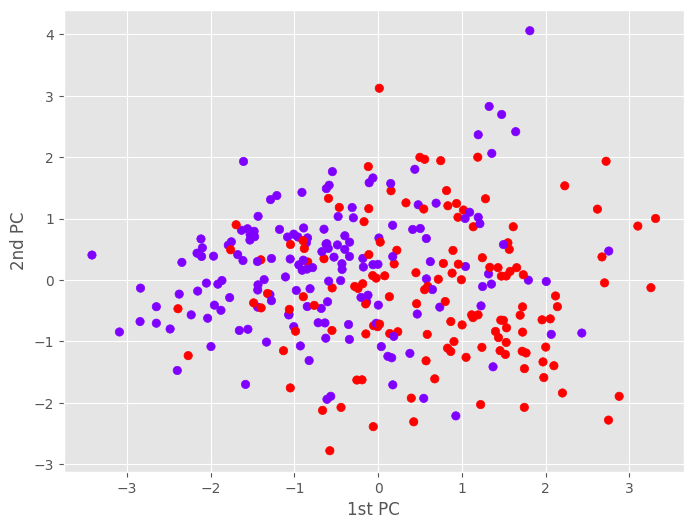

In [51]:
# it is a combination of all the 5 features before

plt.figure(figsize=(8,6))
plt.scatter(x=x_pca[:,0], y=x_pca[:,1], c=data_dropped['class'], cmap='rainbow')
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

### PCA components

When printing the *components_* attribute we can see an array, in which each row represents a principal component, and each column relates back to the original features.

In [52]:
pca.components_

array([[ 0.56678839,  0.38783028,  0.23076713, -0.50785684,  0.46601133],
       [ 0.12291279,  0.41914138,  0.69287222,  0.46934221, -0.32993777]])

In [53]:
df_comp = pd.DataFrame(pca.components_,  columns=numerical)


In [54]:
df_comp

,age,trestbps,chol,thalach,oldpeak
0,0.566788,0.387830,0.230767,-0.507857,0.466011
1,0.122913,0.419141,0.692872,0.469342,-0.329938


### Heatmap for components

By printing a heatmap of *df_comp* we can see the correlation between the features and the components, to determine which features are more important for which components.

<Axes: >

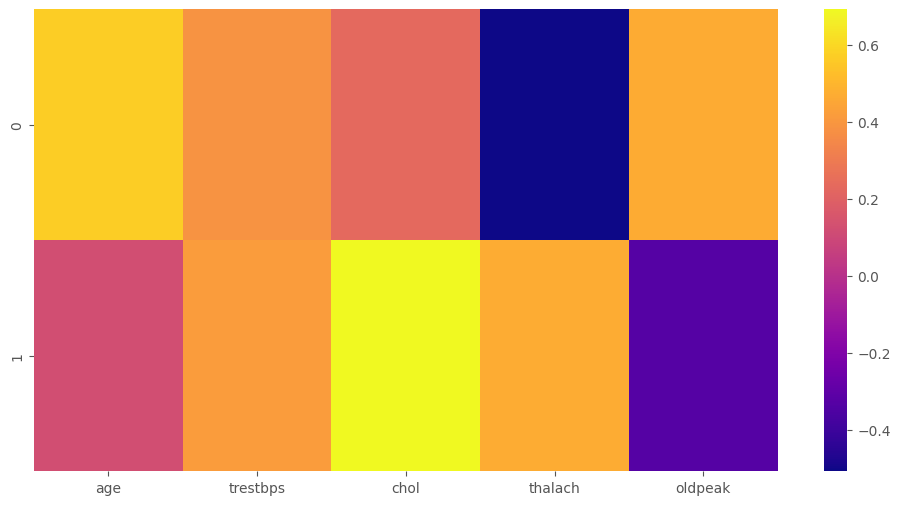

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')



**Outline:**

1. Reading the file, Summary Statistics ✅

2. Missing Values and Imputation ✅

3. EDA (Plotting, Outliers, Highly correlated features) ✅

4. Standardization ✅

5. Principal Component Analysis ✅

# END OF LAB 1

See you in Homework1!